# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

---

**Q1.** This question provides some practice cleaning variables which have common problems:

1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving airbnb_hw.csv to airbnb_hw (2).csv


In [2]:
import pandas as pd

# loading the dataset:
data = pd.read_csv('airbnb_hw.csv')

# observing the data:
print(data.shape, '\n') # dimensions
print(data.dtypes, '\n') # types of variables
print(data.columns, '\n') # column names

(30478, 13) 

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object 

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object') 



In [3]:
# displaying the first few rows to understand the format of the data:
data.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [4]:
# displaying the last few rows to understand the format of the data:
data.tail()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
30473,43022976,8/31/2015,10 Mins to Time Square/two floors,Queens,Apartment,NaN,Entire home/apt,11101.0,5.0,1,0,300,NaN
30474,42993382,8/31/2015,"1BR ocean view & F,Q train st",Brooklyn,Apartment,NaN,Private room,11224.0,2.0,1,0,125,NaN
30475,43033067,8/31/2015,Amazing Private Room,Brooklyn,Other,NaN,Private room,11206.0,1.0,1,0,80,NaN
30476,43000991,8/31/2015,Charming private female room: UWS,Manhattan,Apartment,NaN,Private room,10025.0,1.0,1,0,35,NaN
30477,42999189,8/31/2015,Huge Beautiful Bedroom - Astoria,Queens,House,NaN,Private room,11105.0,1.0,1,0,80,NaN


Before coercion: 
 count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object 



<Axes: >

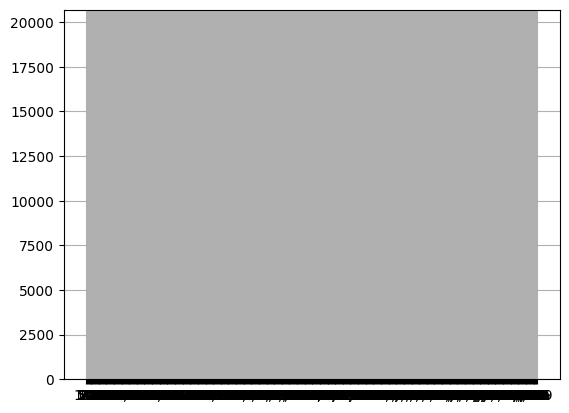

In [5]:
print('Before coercion: \n', data['Price'].describe(),'\n')
data['Price'].hist() # initial histogram. don't even know what i'm looking at

After coercion: 
 count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 

Number of missing values in Price: 0


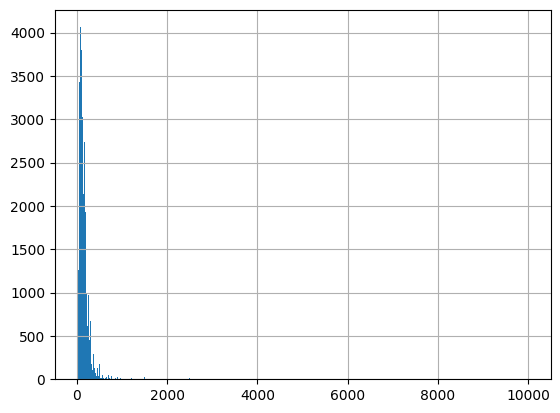

In [6]:
# now we need to clean the `Price` variable:

# cleaning
data['Price'] = data['Price'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)

# coercion:
data['Price'] = pd.to_numeric(data['Price'], errors='coerce') # coerce the variable to be numeric

# counting the missing values:
data['Price_nan'] = data['Price'].isnull() # this outputs 1 if missing, 0 if non-null

print('After coercion: \n', data['Price'].describe(),'\n')
data['Price'].hist(bins = 500) # final histogram
print(f"Number of missing values in Price: {sum(data['Price_nan'])}")

To clean the data, I did two things.
- Cleaning: I removed the `$` and `,` symbols in the `Price` data. Removing the `,` is so numbers over 1000 would not have a comma separator, and removing the `$` in case there are units attached to the `Price` data. Also I turned those values into floats so that they can be converted to numbers in the next step.
- Coercion: I coerced the cleaned string to be numeric so that I can count the missing values.



---



**Q1.** cont'd:
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?


In [7]:
from google.colab import files
uploaded = files.upload()

Saving mn_police_use_of_force.csv to mn_police_use_of_force (2).csv


In [8]:
# loading the dataset:
dt = pd.read_csv('mn_police_use_of_force.csv')

# observing the data:
print(dt.shape, '\n') # dimensions
print(dt.dtypes, '\n') # types of variables
print(dt.columns, '\n') # column names

(12925, 13) 

response_datetime     object
problem               object
is_911_call           object
primary_offense       object
subject_injury        object
force_type            object
force_type_action     object
race                  object
sex                   object
age                  float64
type_resistance       object
precinct               int64
neighborhood          object
dtype: object 

Index(['response_datetime', 'problem', 'is_911_call', 'primary_offense',
       'subject_injury', 'force_type', 'force_type_action', 'race', 'sex',
       'age', 'type_resistance', 'precinct', 'neighborhood'],
      dtype='object') 



In [9]:
# displaying the first few rows to understand the format of the data:
dt.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [10]:
# displaying the last few rows to understand the format of the data:
dt.tail()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
12920,2021/08/30 21:38:46,Assault in Progress,Yes,ASLT5,NaN,Bodily Force,Joint Lock,White,Female,69.0,NaN,1,Loring Park
12921,2021/08/30 22:32:22,Unwanted Person,Yes,CIC,NaN,Bodily Force,Joint Lock,NaN,NaN,NaN,NaN,1,Cedar Riverside
12922,2021/08/31 12:03:08,Overdose w/All,Yes,FORCE,NaN,Bodily Force,Body Weight Pin,Black,Male,NaN,NaN,3,Seward
12923,2021/08/31 12:52:52,Attempt Pick-Up,No,WT,NaN,Bodily Force,Body Weight Pin,Black,Male,31.0,NaN,4,Camden Industrial
12924,2021/08/31 21:34:29,Unwanted Person,No,FORCE,NaN,Bodily Force,Push Away,White,Male,NaN,X,1,North Loop


In [11]:
print(dt['subject_injury'].unique())  # inspecting the unique values

[nan 'No' 'Yes']


In [12]:
import numpy as np

# this ignores the NA answers and just counts the Yes/No answers:
dt['subject_injury'] = dt['subject_injury'].replace(['NA', 'NaN', ' ', ''], np.nan)
print(dt['subject_injury'].value_counts())

subject_injury
Yes    1631
No     1446
Name: count, dtype: int64


In [13]:
# from above, we saw that the dataset has 12925 total entries
# we also know that 1631 people answered 'Yes' and 1446 people answered 'No' for 'subject_injury'
# so the number of people who gave NA answers is: 12925-1631-1446

NA_count = (12925-1631-1446)
total_count = 12925
missing_proportion = NA_count/total_count

print(f"Proportion of missing values: {missing_proportion:.2%}")

Proportion of missing values: 76.19%


In [14]:
# looking at the 'force_type' data by itself:
print(dt['force_type'].value_counts())
print('\n')

# cross-tabulating 'subject_injury' with 'force_type'
cross_tab = pd.crosstab(dt['subject_injury'], dt['force_type'])
print(cross_tab)

force_type
Bodily Force                   9430
Chemical Irritant              1593
Taser                          1307
Maximal Restraint Technique     170
Improvised Weapon               148
Gun Point Display               104
Less Lethal                      87
Police K9 Bite                   77
Baton                             4
Less Lethal Projectile            3
Firearm                           2
Name: count, dtype: int64


force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal Projectile  \
subject_injury                                                                 
No                             33                 34                       1   
Yes                            44                 40    

In [15]:
# now we are calculating the proportion of each force_type that had missing data for subject_injury:

baton_proportion = (4-2)/4
print(f"Baton Proportions: {baton_proportion:.2%}\n")

body_proportion = (9430-1093-1286)/9430
print(f"Bodily Force Proportions: {body_proportion:.2%}\n")

chem_proportion = (1593-131-41)/1593
print(f"Chemical Irritant Proportions: {chem_proportion:.2%}\n")

firearm_proportion = (2-2)/2
print(f"Firearm Proportions: {firearm_proportion:.2%}\n")

gunpoint_proportion = (104-33-44)/104
print(f"Gun Point Display Proportions: {gunpoint_proportion:.2%}\n")

improv_proportion = (148-34-40)/148
print(f"Improvised Weapon: {improv_proportion:.2%}\n")

lesslethal_proportion = (3-3)/3
print(f"Less Lethal Weapons Proportions: {lesslethal_proportion:.2%}\n")

k9_proportion = (87-46)/87
print(f"K9 Bite Proportions: {k9_proportion:.2%}\n")

taser_proportion = (1307-150-172)/1307
print(f"Taser Proportions: {taser_proportion:.2%}")

Baton Proportions: 50.00%

Bodily Force Proportions: 74.77%

Chemical Irritant Proportions: 89.20%

Firearm Proportions: 0.00%

Gun Point Display Proportions: 25.96%

Improvised Weapon: 50.00%

Less Lethal Weapons Proportions: 0.00%

K9 Bite Proportions: 47.13%

Taser Proportions: 75.36%


From above, we can see that the force types that have the most missing data entries for injuries are Bodily Force, Chemical Irritant, and Taser. This might be because the injuries coming from these force types are less obvious than, for example, a gunshot wound, and people may be less likely to report the situation as an injury if it only involves things like temporary discomfort, irritation, or minor injuries that don't require medical attention. Officers may be uncertain on how to document this and opted to leave that cell blank.



---



**Q1.** cont'd:

3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.


In [31]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)

In [17]:
# observing the data:
print(df.shape, '\n') # dimensions
print(df.dtypes, '\n') # types of variables
print(df.columns, '\n') # column names

(22986, 709) 

InternalStudyID                                                 object
REQ_REC#                                                        object
Defendant_Sex                                                   object
Defendant_Race                                                  object
Defendant_BirthYear                                             object
                                                                 ...  
NewFelonySexualAssaultArrest_Disposition                        object
Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis        int64
CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual    object
DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound      int64
CrimeCommission2021ReportClassificationofDefendants             object
Length: 709, dtype: object 

Index(['InternalStudyID', 'REQ_REC#', 'Defendant_Sex', 'Defendant_Race',
       'Defendant_BirthYear', 'Defendant_Age', 'Defendant_AgeGroup',
       'Defendant_AgeatCurrentArr

In [32]:
df.head()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [33]:
df.tail()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
22981,SJA00343,22839,M,B,1976,41,4,41,2,1,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
22982,SJA00344,,F,W,,,9,,99,99,...,,,,999,999,,3,,9,Defendant could not be classified or tracked d...
22983,SJA00345,22841,M,B,1981,36,4,36,1,1,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
22984,SJA00346,22842,F,B,1993,24,2,24,5,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
22985,SJA00347,22843,M,B,1985,31,3,31,2,1,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [34]:
print(df['WhetherDefendantWasReleasedPretrial'].unique())  # inspecting the unique values

[9 0 1]


Since this is a dummy variable, `0` represents `No` and 1 represents `Yes`, and `9` represents the missing values.

In [35]:
# cleaning: replacing missing values with `nan`:
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan)
print(df['WhetherDefendantWasReleasedPretrial'].value_counts())

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
Name: count, dtype: int64




---



**Q1.** cont'd:

4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [36]:
print(df['ImposedSentenceAllChargeInContactEvent'].unique())  # inspecting the unique values

[' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '44' '5' '115' '132' '48'
 '258' '34' '76' '.164271047227926' '.131416837782341' '111' '9' '3'
 '1.97125256673511' '36.9856262833676' '.0657084188911704'
 '35.4928131416838' '106.492813141684' '8' '35' '18.3141683778234' '480'
 '32' '93' '234' '732' '1.16427104722793' '4.6570841889117' '21' '7'
 '4.49281314168378' '18' '600' '43.1642710472279' '179' '52' '30' '20'
 '192' '702' '14' '55' '53' '11.9055441478439' '114' '35.0061601642711'
 '68' '.657084188911704' '46.6242299794661' '102' '65' '200' '57'
 '24.3285420944559' '12.1642710472279' '117' '81.4928131416838'
 '22.4928131416838' '1980' '3.6570841889117' '56' '10' '2.79260780287474'
 '1' '47' '22' '1500' '40' '284' '11' '118' '42' '162' '156'
 '47.2956878850103' '105' '51' '246' '29' '75' '324' '360'
 '34.4804928131417' '120.328542094456' '59.926078

In [51]:
# looking at the 'SentenceTypeAllChargesAtConvictionInContactEvent' data by itself:
print(df['SentenceTypeAllChargesAtConvictionInContactEvent'].value_counts())
print('\n')

# uncleaned data cross-tabulation:
cross_tab = pd.crosstab(df['ImposedSentenceAllChargeInContactEvent'],df['SentenceTypeAllChargesAtConvictionInContactEvent'])
print(cross_tab)

SentenceTypeAllChargesAtConvictionInContactEvent
4    8779
0    8720
1    4299
2     914
9     274
Name: count, dtype: int64


SentenceTypeAllChargesAtConvictionInContactEvent  0   1  2     4    9
ImposedSentenceAllChargeInContactEvent                               
                                                  0   0  0  8779  274
.0328542094455852                                 0   6  0     0    0
.0657084188911704                                 3  21  0     0    0
.0985626283367557                                 2   6  0     0    0
.131416837782341                                  4  10  0     0    0
...                                              ..  .. ..   ...  ...
98                                                0   0  1     0    0
98.95687885                                       0   0  1     0    0
99                                                0   1  0     0    0
99.3285420944559                                  0   1  0     0    0
99.4928131416838                 

From the unique data above, the only entries that might pose a problem is `' '`. That's why I've decided to clean those entries with .replace to make them all be `nan`. In the cross-tabulation we can also see that all of the `4` and `9` entries for `SentenceTypeAllChargesAtConvictionInContactEvent` have corresponding blank entries in `ImposedSentenceAllChargeInContactEvent`, which reinforces the fact that we have to replace those blank entries.

Then, we can see in `ImposedSentenceAllChargeInContactEvent` in the cross-tabulation they only have values `0.3xx` up to `99.xx`, but from the unique data above that we can see many values that go way beyond 99 (three AND four digit numbers). This is why we also need to coerce the variables to be numeric to make sure all the values are numbers.

In [52]:
# cleaning blank spaces:
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].replace(['NA', 'NaN', ' ', ''], np.nan)

#coercing variables to be numeric:
df['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(df['ImposedSentenceAllChargeInContactEvent'], errors='coerce')

In [53]:
# updated cross-tabulation:
cross_tab = pd.crosstab(df['ImposedSentenceAllChargeInContactEvent'],df['SentenceTypeAllChargesAtConvictionInContactEvent'])
print(cross_tab)

SentenceTypeAllChargesAtConvictionInContactEvent     0   1  2
ImposedSentenceAllChargeInContactEvent                       
0.000000                                          4953   0  0
0.032854                                             0   6  0
0.065708                                             3  21  0
0.098563                                             2   6  0
0.131417                                             4  10  0
...                                                ...  .. ..
1200.000000                                          0   0  1
1500.000000                                          0   0  1
1752.000000                                          0   0  1
1980.000000                                          0   0  1
2208.000000                                          0   0  1

[483 rows x 3 columns]


-------------

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [68]:
from google.colab import files
uploaded = files.upload()

Saving GSAF5.xls to GSAF5 (1).xls


In [132]:
# part 1

# the file is a .xls file, so we can use .read_excel
df = pd.read_excel('GSAF5.xls')

# showing the first couple of rows of the data:
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
# part 2

# dropping columns with all missing values:
df.dropna(axis=1, how='all', inplace=True)

# checking the columns that are still here:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [134]:
# part 3

# cleaning the Year column by coercing the values to be numeric:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# understanding the data:
df['Year'].describe()

,Year
count,6990.000000
mean,1935.018598
std,272.082794
min,0.000000
25%,1947.000000
50%,1986.000000
75%,2009.000000
max,2026.000000


As we can see, some of the years look weird (e.g. `0` and `2026`, which hasn't even happened yet!) So when filtering for attacks since 1940, I will exclude `2026` as well, since the year hasn't happened yet so the entry isn't valid (no need to exclude `0` as it is already less than `1940`).

<Axes: title={'center': 'Shark Attacks Over Time'}, xlabel='Year'>

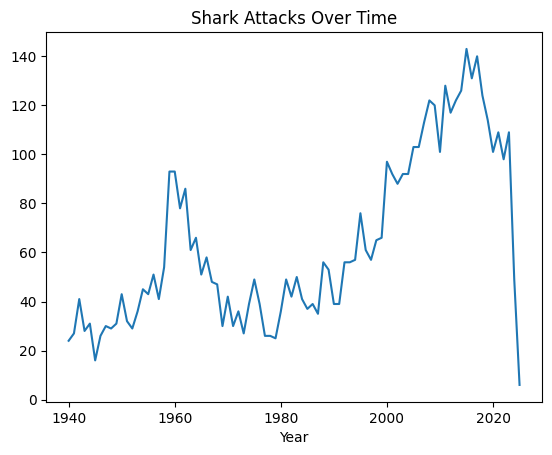

In [135]:
# part 3 cont'd

# filtering for attacks since 1940:
df_filtered = df[(df['Year'] >= 1940) & (df['Year'] <= 2025)]

# checking the trend over time
df_filtered.groupby('Year').size().plot(kind='line', title='Shark Attacks Over Time')

As we can see, the number of shark attacks increased exponentially from `1940` to `1960`, then decreased until `1980`, before it started steadily increasing again up till around `2010`, where there was an abrupt job from a hundred something deaths per year to less than ten deaths a year.

<Axes: title={'center': 'Age of Shark Attack Victims'}, ylabel='Frequency'>

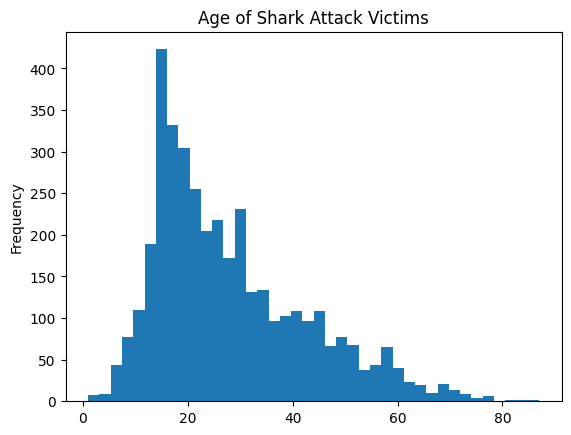

In [136]:
# part 4

# cleaning the Age column by coercing the values to be numeric:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# plotting the histogram for Ages (.dropna() is to get rid of all entries that are nan)
df['Age'].dropna().plot(kind='hist', bins=40, title='Age of Shark Attack Victims')

As we can see, a significant portion of shark attack victims are kids in their teens and young adults in their early 20s. This makes sense, because those are the age demographics that would more frequently go out to sea and surf/swim.

In [137]:
# part 5

# calculating the proportion of male victims:
male_proportion = df['Sex'].value_counts(normalize=True).get('M', 0)
print(f'Proportion of male victims: {male_proportion:.2%}')

Proportion of male victims: 87.53%


Very significantly higher proportion of victims are male! Is this purely because there are more male surfers/swimmers in the ocean or is there some other underlying reason? I don't know.

In [138]:
# part 6

# cleaning the Type variable (only keeping the three types):
df['Type'] = df['Type'].astype(str).str.replace(' ', '')

valid_types = ['Provoked', 'Unprovoked', 'Unknown']
df_cleaned_for_type = df[df['Type'].isin(valid_types)]

# check the unique values again to make sure those are the only types:
print(df_cleaned_for_type['Type'].unique())

['Unprovoked' 'Provoked']


In [139]:
# part 6 cont'd

# calculating the proportion of unprovoked attacks:
unprovoked_proportion = df_cleaned_for_type['Type'].value_counts(normalize=True).get('Unprovoked', 0)
print(f'Proportion of unprovoked attacks: {unprovoked_proportion:.2%}')

Proportion of unprovoked attacks: 88.97%


In [140]:
# part 7

# cleaning the Fatal Y/N variable (only keeping the three types):
df_cleaned_for_type['Fatal Y/N'] = df_cleaned_for_type['Fatal Y/N'].astype(str).str.replace(' ', '')

valid_fatal = ['Y', 'N', 'UNKNOWN']
df_cleaned_for_type_fatal = df_cleaned_for_type[df_cleaned_for_type['Fatal Y/N'].isin(valid_fatal)]

# check the unique values again to make sure those are the only options:
print(df_cleaned_for_type_fatal['Fatal Y/N'].unique())

['N' 'Y' 'UNKNOWN']


<ipython-input-140-db470f5e2527>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_for_type['Fatal Y/N'] = df_cleaned_for_type['Fatal Y/N'].astype(str).str.replace(' ', '')


In [141]:
# part 8

# provoked vs. unprovoked attacks by gender:
crosstab_sex_type = pd.crosstab(df_cleaned_for_type_fatal['Sex'], df_cleaned_for_type_fatal['Type'])
print(crosstab_sex_type)
print('\n')

# calculating the fatality rate for provoked and unprovoked attacks:
crosstab_type_fatal = pd.crosstab(df_cleaned_for_type_fatal['Type'], df_cleaned_for_type_fatal['Fatal Y/N'])
print(crosstab_type_fatal)
print('\n')

# calculate the fatality rate by gender:
crosstab_sex_fatal = pd.crosstab(df_cleaned_for_type_fatal['Sex'], df_cleaned_for_type_fatal['Fatal Y/N'])
print(crosstab_sex_fatal)
print('\n')

Type  Provoked  Unprovoked
Sex                       
 M           0           1
F           31         664
M          542        4296
M            0           2
N            1           0
lli          0           1


Fatal Y/N      N  UNKNOWN     Y
Type                           
Provoked     608        3    21
Unprovoked  3823       57  1251


Fatal Y/N     N  UNKNOWN     Y
Sex                           
 M            1        0     0
F           578        4   113
M          3698       34  1106
M             2        0     0
N             0        0     1
lli           1        0     0




As we can see from the cross-tabulations above:
- sharks are more likely to launch unprovoked attacks on men
- the attack is more likely to be fatal when the attack is unprovoked (or, the attack is less likely to be fatal when the attack is provokeda)
- the attack is more likely to be fatal when the victim is male, but not significantly (fatality for men is 30% while fatality for women is 20%)

I do not like sharks. The movie Jaws scared me a lot when I was younger and there was also a couple of shark spotting at a beach I surfed at when I was younger and that scared me a lot too.

In [144]:
# part 10
df['Species '] = df['Species '].str.split().str[0]

# calculating the proportion of attacks involving white sharks:
white_shark_proportion = df['Species '].value_counts(normalize=True).get('White', 0)
print(f'Proportion of attacks by white sharks: {white_shark_proportion:.2%}')

Proportion of attacks by white sharks: 12.86%




---



**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q3 Answers:**

1. The paper introduces the concept of data tidying to simplifies data analysis. They should have a consistent structure where each variable is represented by a column, each observation is represented by a row, and each type of observational unit is represented by a table. This way, messy datasets can be tidied using only a small set of tools.

2. The "tidy data standard" is made to simplify the data cleaning process by always using the same structure for organizing datasets. This eliminates the need to repeatedly "reinvent the wheel" during data cleaning and makes it much more convenient to explore and analyze data. Then, data analysts can focus more on solving actual real-life problems rather than structural issues with the ata structure.

3. The first sentence means that tidy datasets follow a standardized structure so they are all structurally the same, while messy datasets can take many different disorganized forms which could all need different data cleaning methods. The second sentence means that identifying observations and variables is often intuitive for a given specific datasets, but creating a general definitions for these concepts is hard because real-world datasets come in all shapes and forms.

4. Wickham defines **values** as the individual pieces of data within a dataset and can be either quantitative or qualitative. Each value belongs to a variable and an observation. A **variable** is a group of all the values that measure the same characteristic (e.g. height or temperature). An **observation** is a group of all the values recorded for the same "unit" (e.g. a person / day / event).

5. "Tidy Data" is defined as a standardized way of mapping a dataset's meaning to its structure. The key principles of tidy data are: "Each variable forms a column," "Each observation forms a row," and "Each type of observational unit forms a table."

6. The five most common problems with messy datasets are: (1) column headers being values, not variable names; (2) multiple variables stored in one column; (3) variables stored in both rows and columns; (4) multiple types of observational units stored in the same table; and (5) a single observational unit stored in multiple tables. The data in Table 4 is messy, because the dataset has three variables distributed across both rows and columns. The dataset needs to be "melted", which means we "turn columns into rows."

7. Table 11 is messy because it has multiple variables stored across both rows and columns. Specifically, the temperature measurements (max and min) are spread across several columns for each day of the month, making the data difficult to analyze. This is not a tidy dataset. On the otherhand, Table 12 is tidy and "molten" because the data's columns have been turned into rows (i.e. "melted"). In this table, each row represents one single observation, with columns for the date, element (tmax or tmin), and the corresponding value. This is a tidy dataset.

8. The "chicken-and-egg" problem with focusing on tidy data is that how useful tidy data is is closely tied to the tools we have to work with the data, so for our data structures to improve, our tools must improve too. This can lead to a "local maxima" where improving the data structure or the tools alone will not improve workflow. Wickham hopes that more work on data wrangling in the future will help us break out of this cycle and develop better data storage strategies and better tools. He also says that fields like user-centered design and human-computer interaction could help improve our understanding of the cognitive aspects of data analysis and design better tools for data wrangling.









---



**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?